# [Draft] Data Structure Series - Bloom Filter

## What is it?
It is a probabilistic data structure, that is commonly used to ask question "whether an element is in it or not?". From my description, it does seems like a job that [Set](https://brilliant.org/wiki/sets-adt/) can do, sooo...

## Why Should We Use It?
The major advantage of Bloom Filter is [space complexity](https://www.cs.northwestern.edu/academics/courses/311/html/space-complexity.html), while other data structures, such as Set and HashTable requires to store the data itself, Bloom Filter does not requires data storing. 

## When Should We Use It?
Although Bloom filter has major space complexity advantage, yet it can only answer in probabilistic term: whether an item is "possibly in the filter" or "not a chance in the filter". Because of this characteristic of Bloom filter, you will only want to use it if :
1. You need better space complexity.
2. You can tolerate false positives.
3. You would not need to delete items from the filter. Simple bloom filter cannot support removal operation.

## How Should We Implement It?
There are a couple of components to implement the bloom filter.

### A Simple Bloom Filter

In [49]:
import sys
import math
# using murmur hashing function because it returns integer
import mmh3

In [23]:
# use bitarray to manage our main data structure
from bitarray import bitarray

In [93]:
class SimpleBloomFilter(object):
    def __init__(self, hash_fn, m, fpr):
        self._fpr = fpr
        self._hash_fn = hash_fn
        
        # size of bitarray that we should construct
        self.size = int(-(m * math.log(fpr)) / (math.log(2) ** 2))
        
        # k = how many time should we do the hash
        self._k = math.ceil((m/self.size) * math.log(2))
        
        # construct and initialize the bit array
        self._bit_array = bitarray(self.size)
        self._bit_array.setall(0)
        
    def add(self, item):

        for i in range(self._k):
            digest = self._hash_fn.hash(item, i) % self.size
            # set the bit into 1
            self._bit_array[digest] = 1
    
    def is_possibly_exists(self, item):
        for i in range(self._k):
            digest = self._hash_fn.hash(item, i) % self.size
            # check if the digest is in bit array
            # if there is one 0 found in bit_array, then
            # the item does not exists at all
            if not self._bit_array[digest]:
                return False
            
        return True
    

After we have constructed the simple bloom filter class, we are now ready to test this out!

In [70]:
test_elements = [
    'hello world',
    'hello 1',
    'hello3'
]
bf = SimpleBloomFilter(mmh3, len(test_elements), 0.01)
for el in test_elements:
    bf.add(el)
    
for el in test_elements:
    print('is `{}` exists in the filter? {}'.format(el, bf.is_possibly_exists(el)))

test1 = 'not exists'
print('is `{}` exists in the filter? {}'.format(test1, bf.is_possibly_exists(test1)))

is `hello world` exists in the filter? True
is `hello 1` exists in the filter? True
is `hello3` exists in the filter? True
is `not exists` exists in the filter? False


It turns out working like we are expecting! Hurray! Now we want to see how much space that we save for implementing the bloom filter

In [71]:
print('size of test elements: {} bytes'.format(sys.getsizeof(test_elements)))
print('size of bloom filters: {} bytes'.format(sys.getsizeof(bf)))

size of test elements: 88 bytes
size of bloom filters: 56 bytes


It doesn't seems to be much of saving, eh? Let's simulate it with larger elements!


![bigger](https://media.giphy.com/media/12TZXEURLhb7fG/giphy.gif)

In [109]:
import hashlib

def simulate_bloom_filter_size(element_size):
    # generate larger test elements
    test_elements = list()
    test_element_length = element_size
    bf = SimpleBloomFilter(mmh3, test_element_length, 0.01)

    for i in range(test_element_length):
        str_generator = hashlib.md5('{}'.format(i).encode())
        el = str_generator.hexdigest()
        test_elements.append(el)
    
    return (sys.getsizeof(test_elements), sys.getsizeof(bf._bit_array), bf)

In [110]:
el_size = 10000
print('With {} Elements'.format(el_size))
print('------------------------------------------')
data_size, bf_size, _ = simulate_bloom_filter_size(el_size)
print('size of test elements: {:,} bytes'.format(data_size))
print('size of bloom filters: {:,} bytes'.format(bf_size))

With 10000 Elements
------------------------------------------
size of test elements: 87,624 bytes
size of bloom filters: 96 bytes


<center>
  ![more](https://media.giphy.com/media/l1IY1i4qQ6pwSw5dC/giphy.gif)
</center>

Okay we got this, but we want to know more! what if we extends until 100000?

In [111]:
import numpy as np
import matplotlib.pyplot as plt

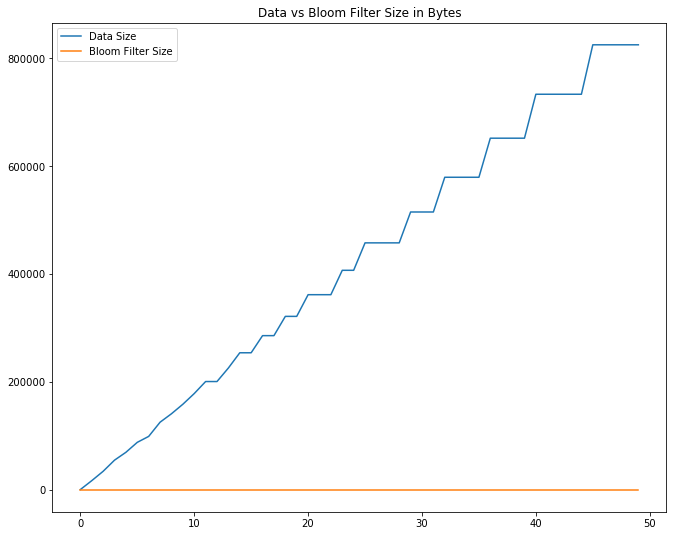

In [112]:
observation_len = 50
c = np.linspace(1, 100000, observation_len)
data_sizes = list()
bf_sizes = list()
for el_size in c:
    data_size, bf_size, bf = simulate_bloom_filter_size(int(el_size))
    data_sizes.append(data_size)
    bf_sizes.append(bf_size)

f, ax = plt.subplots(figsize=(11, 9))
plt.title('Data vs Bloom Filter Size in Bytes')
plt.plot(np.arange(observation_len), data_sizes, label='Data Size')
plt.plot(np.arange(observation_len), bf_sizes, label='Bloom Filter Size')
plt.legend()
plt.show()

In [114]:
print('largest data size: {:,} bytes'.format(data_sizes[-1]))
print('largest bloom filter size: {:,} bytes'.format(bf_sizes[-1]))

largest data size: 824,464 bytes
largest bloom filter size: 96 bytes


# Conclusion
1. Bloom Filter is awsome! (if you have matched the condition to use it!)

<center>
![awesome](https://media.giphy.com/media/d2Z9QYzA2aidiWn6/giphy.gif)
</center>

# References
- https://en.wikipedia.org/wiki/Bloom_filter
- https://stackoverflow.com/questions/11669178/how-to-create-an-array-of-bits-in-python
- https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/
- https://stackoverflow.com/questions/449560/how-do-i-determine-the-size-of-an-object-in-python